IMPORTAÇÃO DE BIBLIOTECAS

ANÁLISE EXPLORATÓRIA E PREDITIVA DE AVC COM BASE EM ALGUMAS VARIÁVEIS CONFORME O DATASET healthcare_dataset_stroke_data DISPONÍVEL NO KAGGLE.

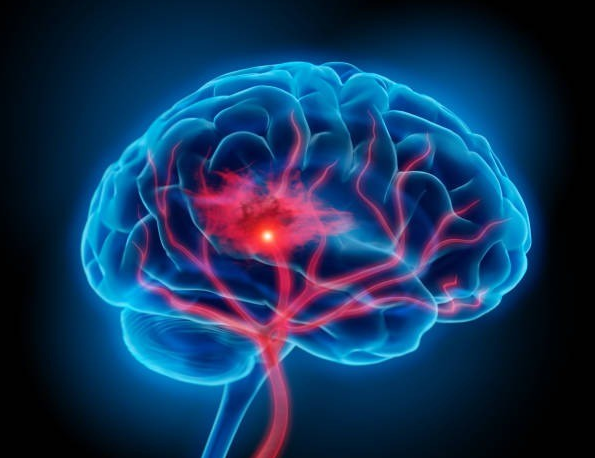

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
import seaborn as sns

Função Principal - Regressão Logística

In [3]:
Funcao_Logistica = LogisticRegression()

Carregamento e visualização Inicial dos dados 

In [4]:
avc = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=',') 
avc.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#OBSERVANDO TYPES
avc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# OBSERVANDO QUANTAS LINHAS E COLUNAS TEMOS NO DATASET
qtd_linhas = avc.shape[0]
qtd_colunas = avc.shape[1]

print(f'O dataset possui {qtd_linhas} linhas e {qtd_colunas} colunas sendo analisados')

O dataset possui 5110 linhas e 12 colunas sendo analisados


RENOMEANDO CAMPOS

In [7]:
avc.rename(columns={'gender'       : 'sexo',
                   'age'           : 'idade', 
                   'hypertension'  : 'hipertenso',
                   'heart_disease' : 'cardiaco',
                   'ever_married'  : 'casado',
                   'work_type'     : 'trabalho_tipo',
                   'Residence_type': 'residencia_tipo',
                   'avg_glucose_level' : 'media_nivel_glicose',
                   'bmi'               : 'imc',
                   'smoking_status'    : 'fumante',
                   'stroke'            : 'avc'
                   },
           inplace=True)

# Trocando os valores do Dataset para Português
# IDENTIFICAR PELO VALUE_COUNTS OU DE OUTRA FORMA OS TIPOS DE INFORMAÇÕES DOS CAMPOS.
avc.replace({'sexo': {'Male' : 'Homem', 'Female' : 'Mulher', 'Other' : 'Outro'}}, inplace=True)
avc.replace({'casado': {'Yes' : 'Sim', 'No' : 'Não'}}, inplace=True)
avc.replace({'trabalho_tipo': {'Private' : 'Privado', 'Self-employed' : 'Conta-propria', 'Children' : 'Criança', 'Govt_job': 'Setor Público', 'Never_worked' : 'Nunca Trabalhou'}}, inplace=True)
avc.replace({'residencia_tipo': {'Urban' : 'Urbana', 'Rural' : 'Rural'}}, inplace=True)
avc.replace({'fumante' : {'never smoked' : 'Nunca fumou', 'Unknow' : 'Desconhecido', 'formerly smoked' : 'Já fumou antes', 'smokes' : 'Fumante'}}, inplace=True)
avc.head(10)

,id,sexo,idade,hipertenso,cardiaco,casado,trabalho_tipo,residencia_tipo,media_nivel_glicose,imc,fumante,avc
0,9046,Homem,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou antes,1
1,51676,Mulher,61.0,0,0,Sim,Conta-propria,Rural,202.21,NaN,Nunca fumou,1
2,31112,Homem,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou,1
3,60182,Mulher,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fumante,1
4,1665,Mulher,79.0,1,0,Sim,Conta-propria,Rural,174.12,24.0,Nunca fumou,1
5,56669,Homem,81.0,0,0,Sim,Privado,Urbana,186.21,29.0,Já fumou antes,1
6,53882,Homem,74.0,1,1,Sim,Privado,Rural,70.09,27.4,Nunca fumou,1
7,10434,Mulher,69.0,0,0,Não,Privado,Urbana,94.39,22.8,Nunca fumou,1
8,27419,Mulher,59.0,0,0,Sim,Privado,Rural,76.15,NaN,Unknown,1
9,60491,Mulher,78.0,0,0,Sim,Privado,Urbana,58.57,24.2,Unknown,1


DROPANDO COLUNAS DESNECESSÁRIAS E VERIFICANDO DADOS MISSING

In [8]:
avc.drop(['id'],axis=1,inplace = True)
avc.isnull().sum()


sexo                     0
idade                    0
hipertenso               0
cardiaco                 0
casado                   0
trabalho_tipo            0
residencia_tipo          0
media_nivel_glicose      0
imc                    201
fumante                  0
avc                      0
dtype: int64

ELIMINANDO DADOS MISSING

In [9]:
avc.dropna(inplace=True)

ADICIONANDO VISUALIZAÇÕES PARA CONHECIMENTO DO DATASET

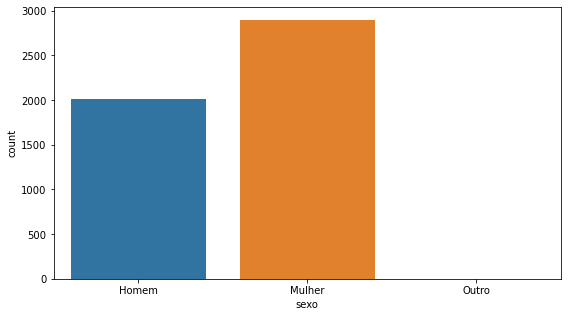

In [10]:

xplot= ['sexo', 'residencia_tipo', 'imc']
fig=plt.figure(figsize=(20,23))
ax=plt.subplot(4,2,2)
sns.countplot(x=xplot[0], data=avc)
plt.show()

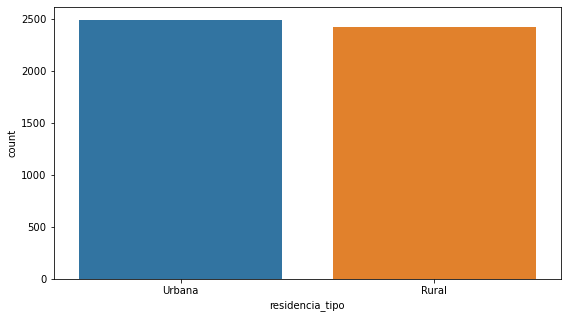

In [11]:
fig=plt.figure(figsize=(20,23))
ax=plt.subplot(4,2,2)
sns.countplot(x=xplot[1], data=avc)
plt.show()

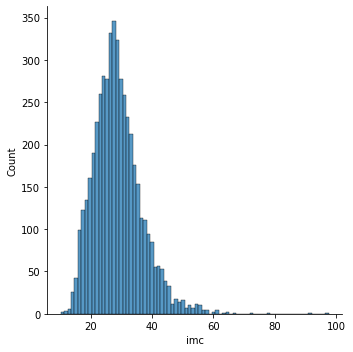

In [12]:
#IMC
sns.displot(x='imc', data=avc)
plt.show()

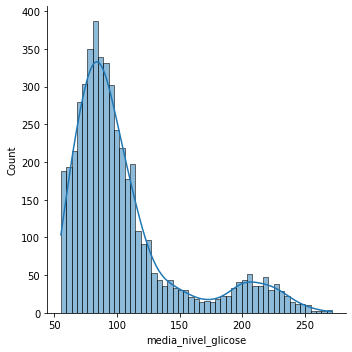

In [13]:
#MEDIA NIVEL GLICOSE
sns.displot(x='media_nivel_glicose', data=avc, kde=True)
plt.show()

In [14]:
# USANDO A REGRA DE STURGES PARA DEFINIÇÃO DE QTD. FREQUÊNCIAS.
n = avc.shape[0]
k = 1 + (10 / 3) * np.log10(n)
k = int(k.round(0))
k

13

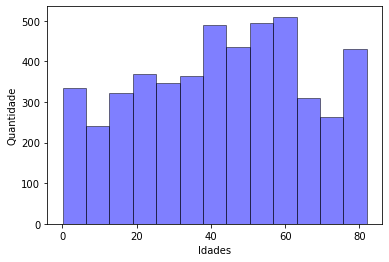

In [15]:
plt.hist(avc['idade'], bins=13, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.show()

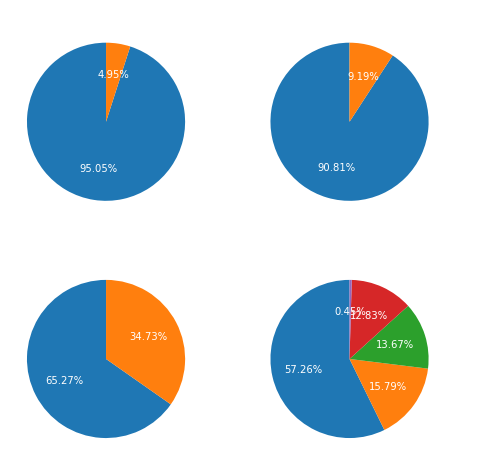

In [16]:
hipertenso_qtd = avc['hipertenso'].value_counts()
casado_qtd = avc['casado'].value_counts()
cardiaco_qtd = avc['cardiaco'].value_counts()
trabalho_tipo_qtd = avc['trabalho_tipo'].value_counts()
residencia_tipo_qtd = avc['residencia_tipo'].value_counts()
fumante_qtd = avc['fumante'].value_counts()

plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title('HIPERTENSO', color='w')
plt.pie(x=cardiaco_qtd, labels=cardiaco_qtd.index, autopct='%1.2f%%', textprops={'color': 'w'}, startangle=90)
plt.subplot(2,2,2)
plt.title('CARDÍACO', color='w')
plt.pie(x=hipertenso_qtd, labels=hipertenso_qtd.index, autopct='%1.2f%%', textprops={'color': 'w'}, startangle=90)
plt.subplot(2,2,3)
plt.pie(x=casado_qtd, labels=casado_qtd.index, autopct='%1.2f%%', textprops={'color': 'w'}, startangle=90)
plt.title('CASADO', color='w')
plt.subplot(2,2,4)
plt.pie(x=trabalho_tipo_qtd, labels=trabalho_tipo_qtd.index, autopct='%1.2f%%', textprops={'color': 'w'}, startangle=90)
plt.title('TRABALHO TIPO', color='w')
plt.show()

<AxesSubplot:xlabel='fumante', ylabel='count'>

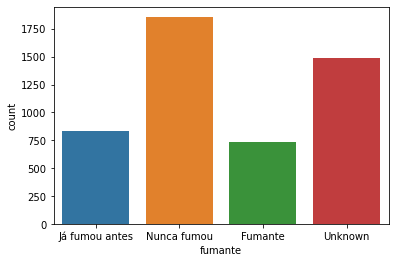

In [17]:
sns.countplot(x='fumante', data=avc)

TRANSFORMANDO CAMPOS PARA DUMMIE

In [18]:
avc['sexo'] = pd.factorize(avc['sexo'])[0]
avc['casado'] = pd.factorize(avc['casado'])[0]
avc['trabalho_tipo'] = pd.factorize(avc['trabalho_tipo'])[0]
avc['residencia_tipo'] = pd.factorize(avc['residencia_tipo'])[0]
avc['fumante'] = pd.factorize(avc['fumante'])[0]
avc.head(10)


,sexo,idade,hipertenso,cardiaco,casado,trabalho_tipo,residencia_tipo,media_nivel_glicose,imc,fumante,avc
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1
6,0,74.0,1,1,0,0,1,70.09,27.4,1,1
7,1,69.0,0,0,1,0,0,94.39,22.8,1,1
9,1,78.0,0,0,0,0,0,58.57,24.2,3,1
10,1,81.0,1,0,0,0,1,80.43,29.7,1,1
11,1,61.0,0,1,0,2,1,120.46,36.8,2,1


PLOTANDO A VARIÁVEL TARGET PARA VERIFICAR O BALANCEAMENTO DO DATASET.

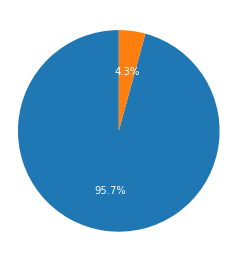

------------------------------------------
QUANTIDADES DE AVC NO DATASET: 
0 = Não, 1 = Sim


0    4700
1     209
Name: avc, dtype: int64

In [19]:
avc_qtd = avc['avc'].value_counts()

plt.figure(figsize=(4, 4))  # Tamanho da figura
plt.pie(avc_qtd, labels=avc_qtd.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'w'})
plt.title('AVC', color='w')
plt.axis('equal')  # Para garantir que a pizza seja desenhada como um círculo

# Mostrar o gráfico
plt.show()

AVC_0 = avc[avc.iloc[:,-1]==0]
AVC_1 = avc[avc.iloc[:,-1]==1]

print('------------------------------------------')
print('QUANTIDADES DE AVC NO DATASET: ')
print('0 = Não, 1 = Sim')
avc['avc'].value_counts()

APÓS OBSERVARMOS O DESBALANCEAMENTO VAMOS BALANCEAR O TARGET.

In [20]:
AVC_1 = resample(AVC_1,replace=True , n_samples=AVC_0.shape[0] , random_state=250)


PASSANDO X E Y COM NOVAS VARIÁVEIS

CONCATENANDO DATAFRAMES REBALANCEADOS

In [21]:
avc = np.concatenate((AVC_0,AVC_1))

avc = pd.DataFrame(avc)
avc.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,3.0,0.0,0.0,1.0,3.0,1.0,95.12,18.0,3.0,0.0
1,0.0,58.0,1.0,0.0,0.0,0.0,0.0,87.96,39.2,1.0,0.0
2,1.0,8.0,0.0,0.0,1.0,0.0,0.0,110.89,17.6,3.0,0.0
3,1.0,70.0,0.0,0.0,0.0,0.0,1.0,69.04,35.9,0.0,0.0
4,0.0,14.0,0.0,0.0,1.0,4.0,1.0,161.28,19.1,3.0,0.0


In [22]:
#RENOMEANDO NOVAMENTE AS COLUNAS
avc.rename(columns={0              : 'sexo',
                   1               : 'idade', 
                   2               : 'hipertenso',
                   3               : 'cardiaco',
                   4               : 'casado',
                   5               : 'trabalho_tipo',
                   6               : 'residencia_tipo',
                   7               : 'media_nivel_glicose',
                   8               : 'imc',
                   9               : 'fumante',
                   10              : 'avc'
                   },
           inplace=True)

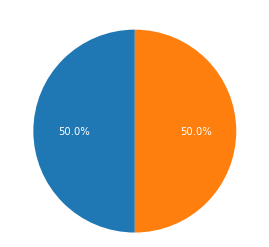

In [23]:
#VISUALIZANDO O BALANCEAMENTO DA TARGET NOVAMENTE APÓS NORMALIZAR.
avc_qtd = avc['avc'].value_counts()

plt.figure(figsize=(4, 4))  # Tamanho da figura
plt.pie(avc_qtd, labels=avc_qtd.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'w'})
plt.title('AVC', color='w')
plt.axis('equal')  # Para garantir que a pizza seja desenhada como um círculo

# Mostrar o gráfico
plt.show()

In [24]:
caracteristicas_avc = avc.iloc[:,2:10].values
previsao = avc.iloc[:,10:11].values

OBSERVANDO NOVAMENTE O BALANCEAMENTO

In [25]:

avc['avc'].value_counts()

0.0    4700
1.0    4700
Name: avc, dtype: int64

In [26]:
#avc = pd.get_dummies(data=avc)
#avc.head(10)

PRÉ-PROCECESSAMENTO

PASSANDO OS DADOS DE TREINO, TESTE E PARÂMETROS PARA TESTES

In [27]:
x_treino, x_teste, y_treino, y_teste = train_test_split( caracteristicas_avc, previsao, test_size=0.20)

OBSERVANDO TAMANHO DO DATASET PARA TREINO E TESTES.

In [28]:
print( len(x_treino) )
print( len(x_teste) )

7520
1880


APLICANDO A REGRESSÃO LOGISTICA.

In [29]:
Funcao_Logistica.fit(x_treino, y_treino )

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

MEDINDO A ACURÁCIA DO MODELO COM O MÉTODO ACCURACY_SCORE.

In [30]:
previsao = Funcao_Logistica.predict(x_teste)
acuracia = accuracy_score(y_teste, previsao)

# Imprime a acurácia formatada com o símbolo de porcentagem
print(f'A acertividade do modelo foi de: {acuracia * 100:.2f}%')

A acertividade do modelo foi de: 67.93%
